In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
df = pd.read_csv(r'C:\Users\anogueira\OneDrive - OSIsoft, LLC\Data Science\USP\DataSet\processedFiles.csv')

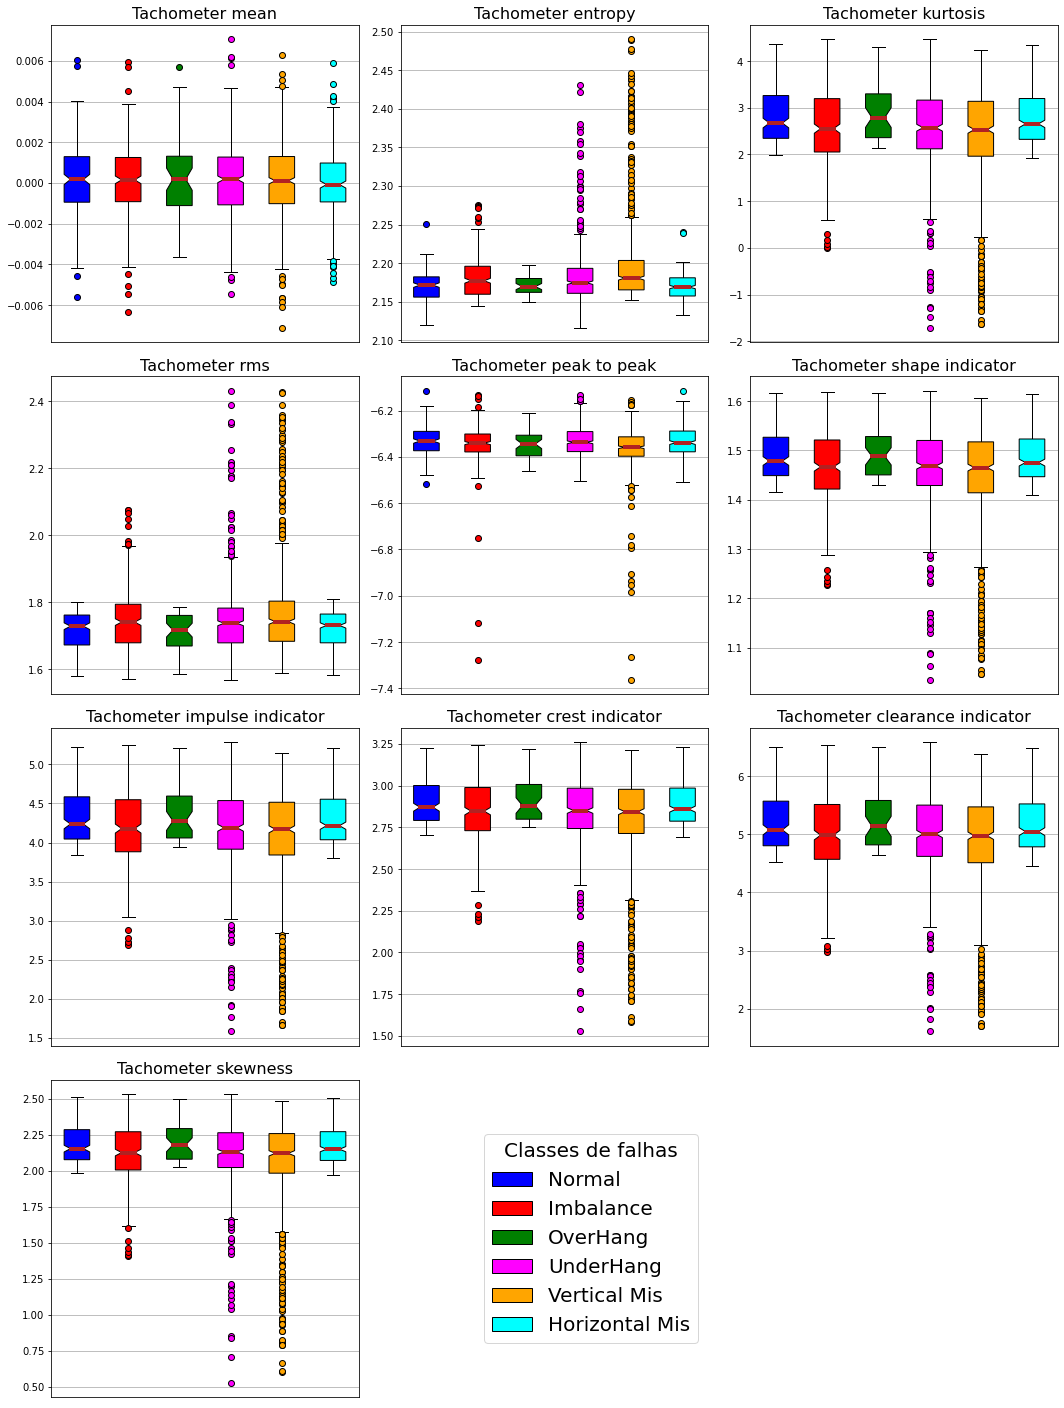

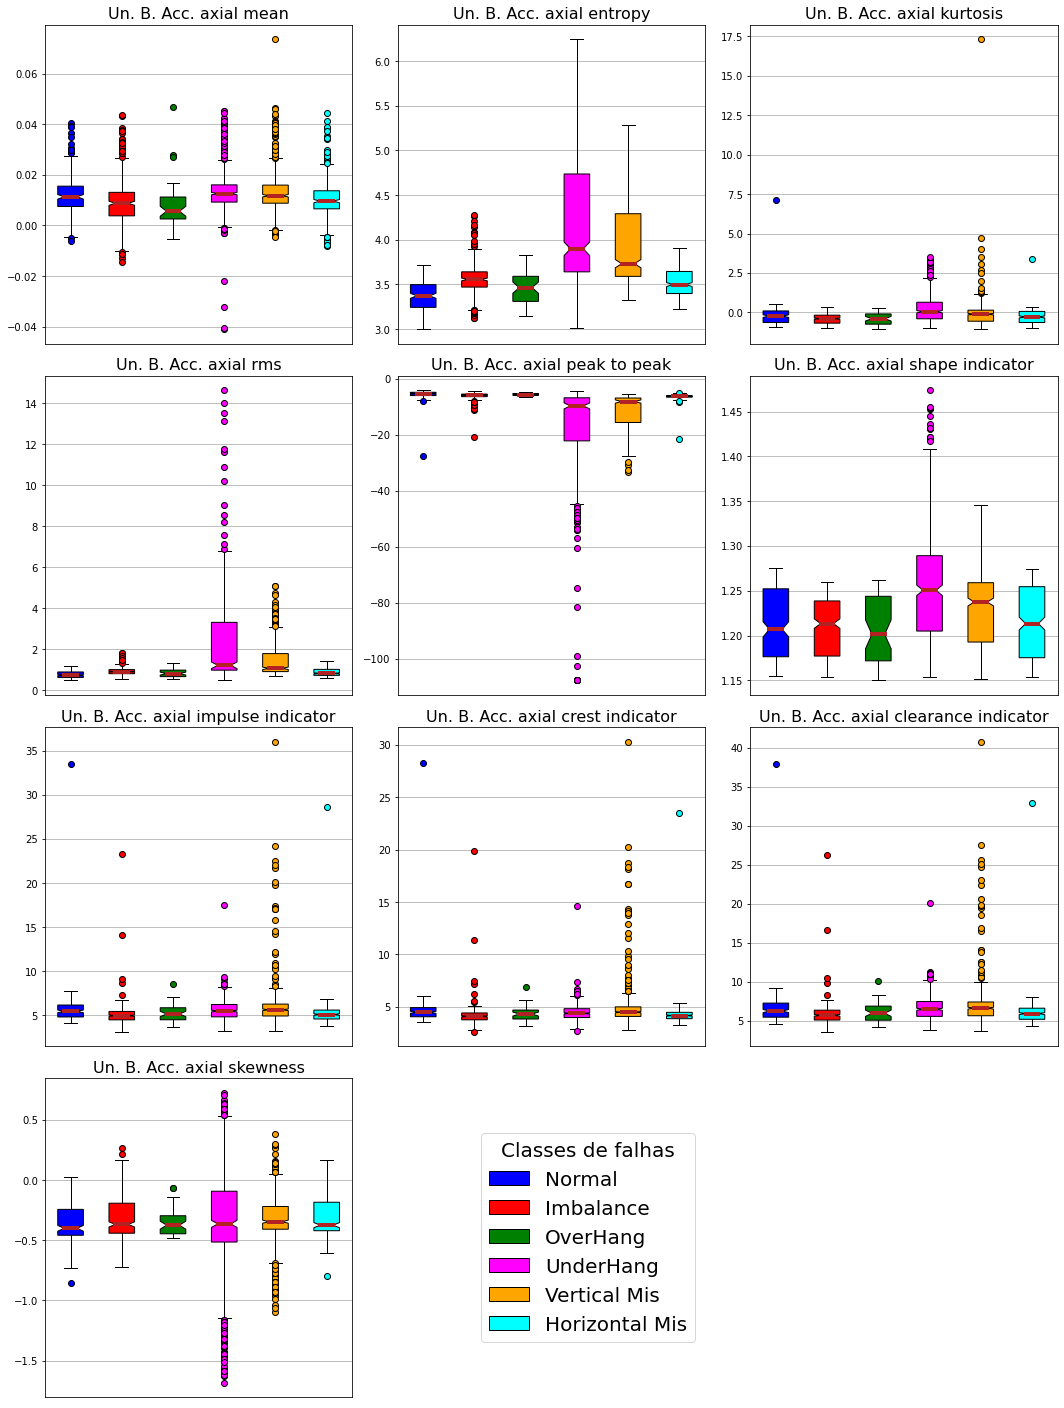

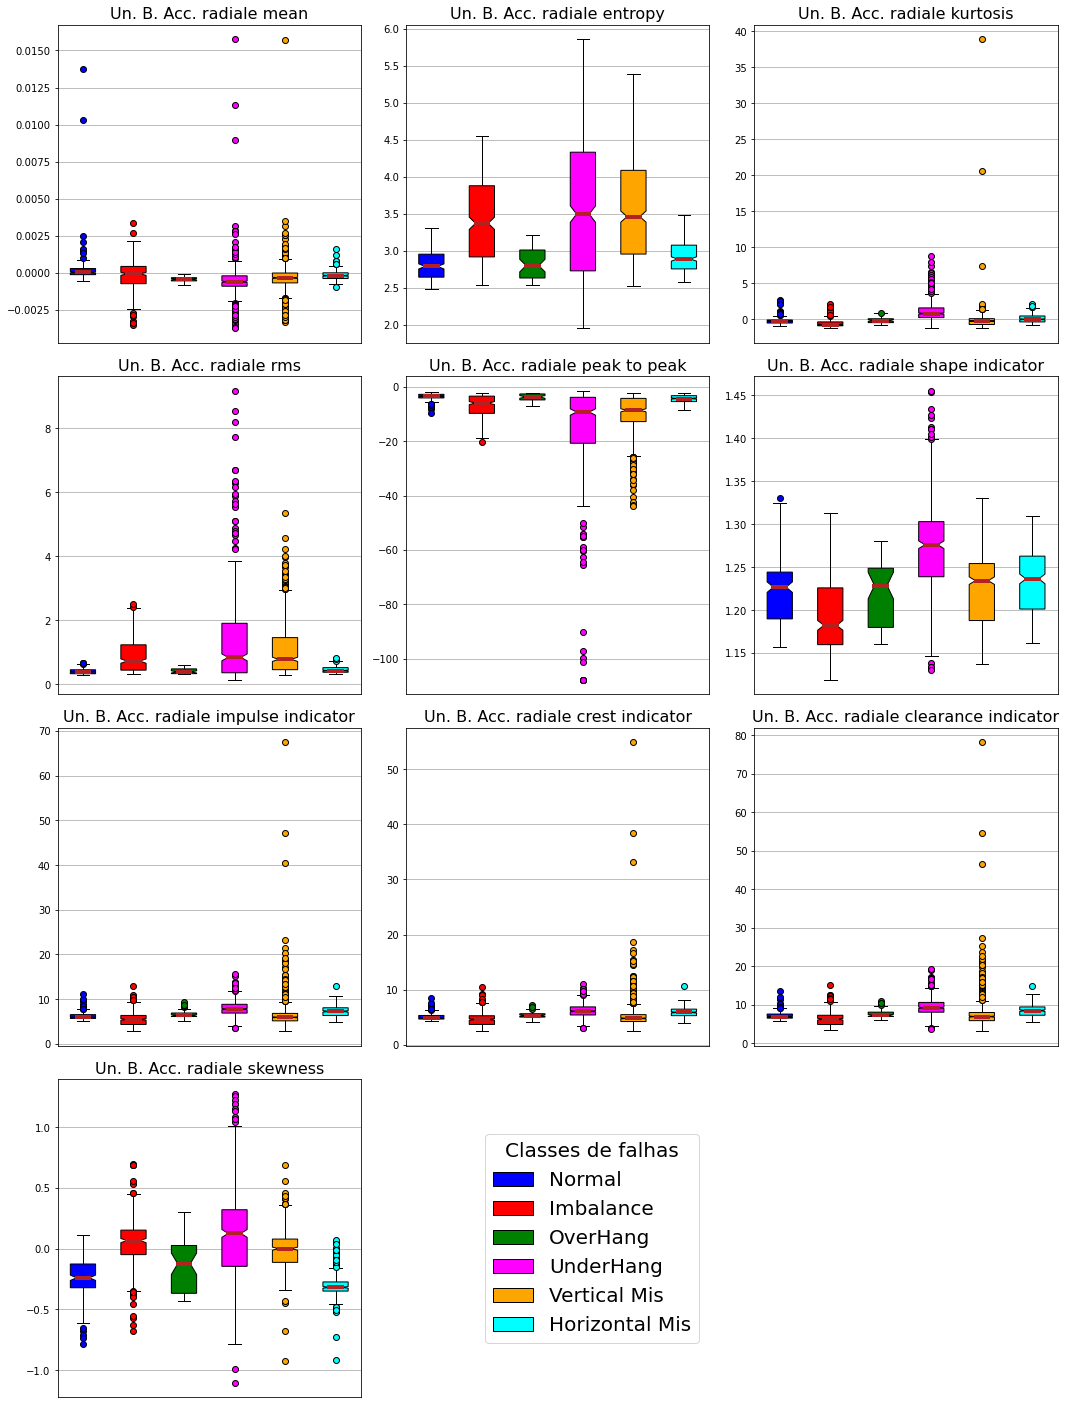

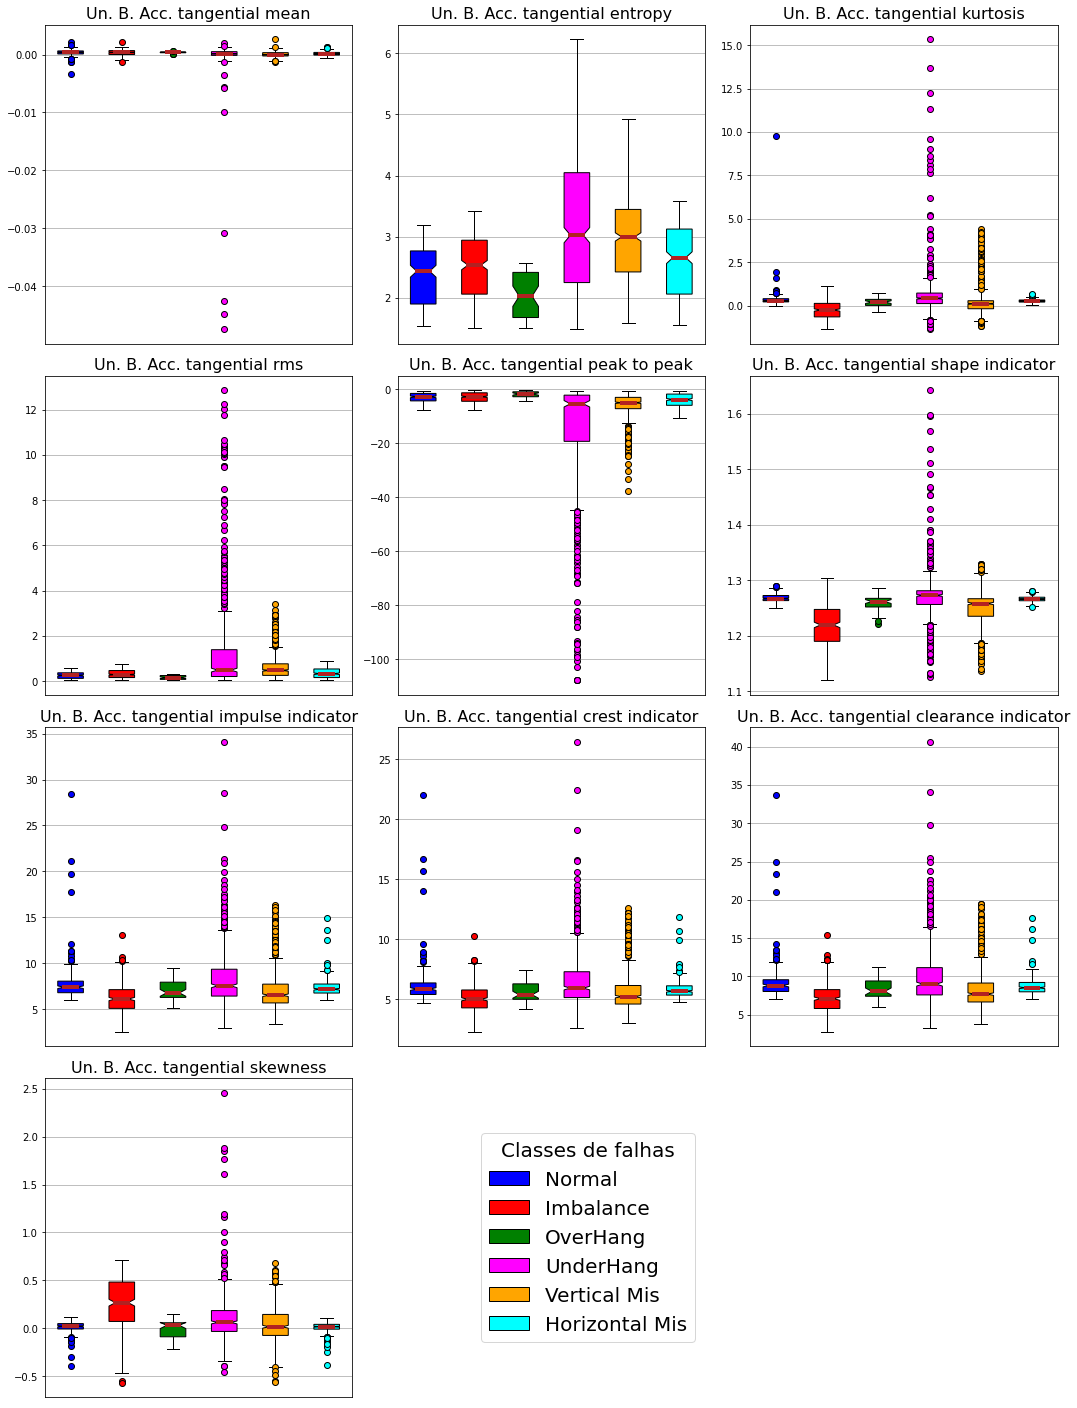

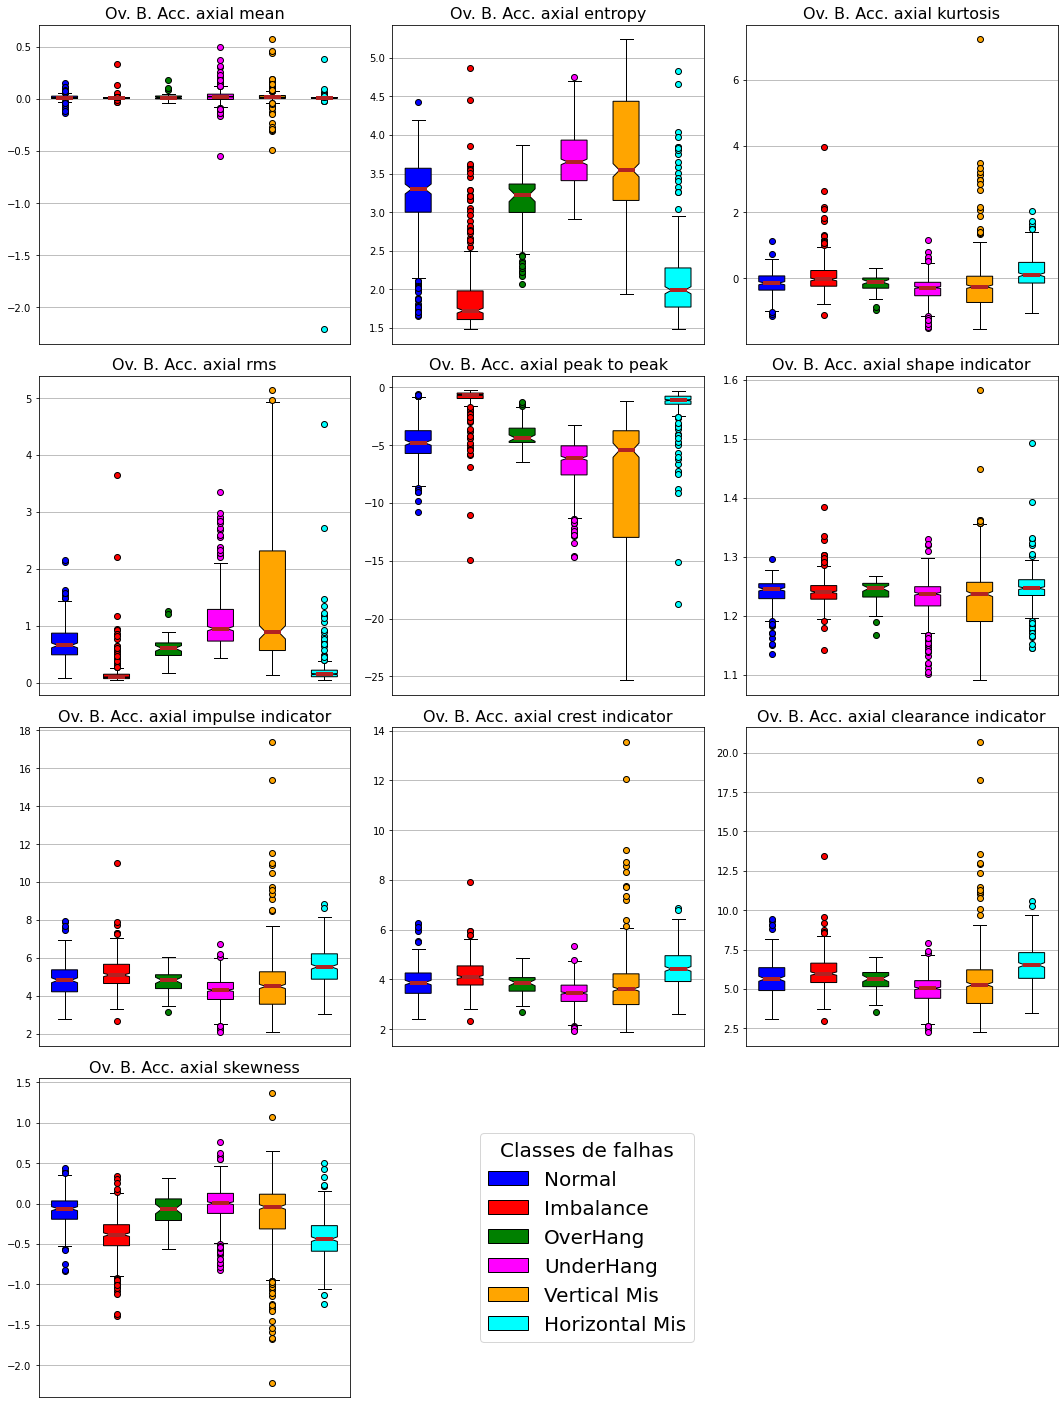

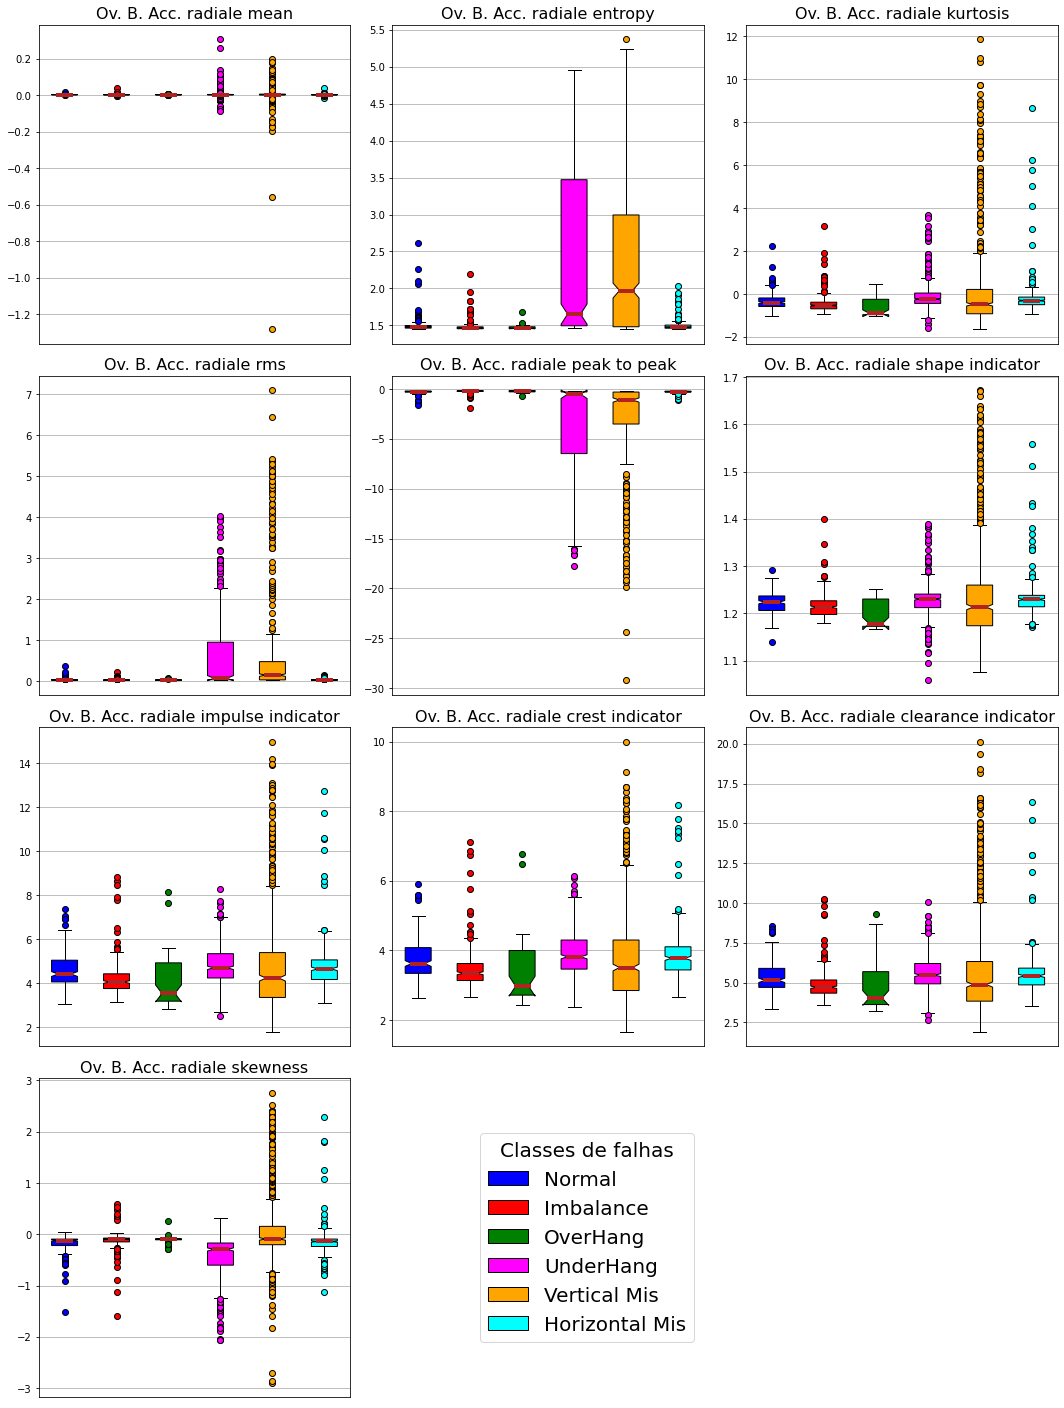

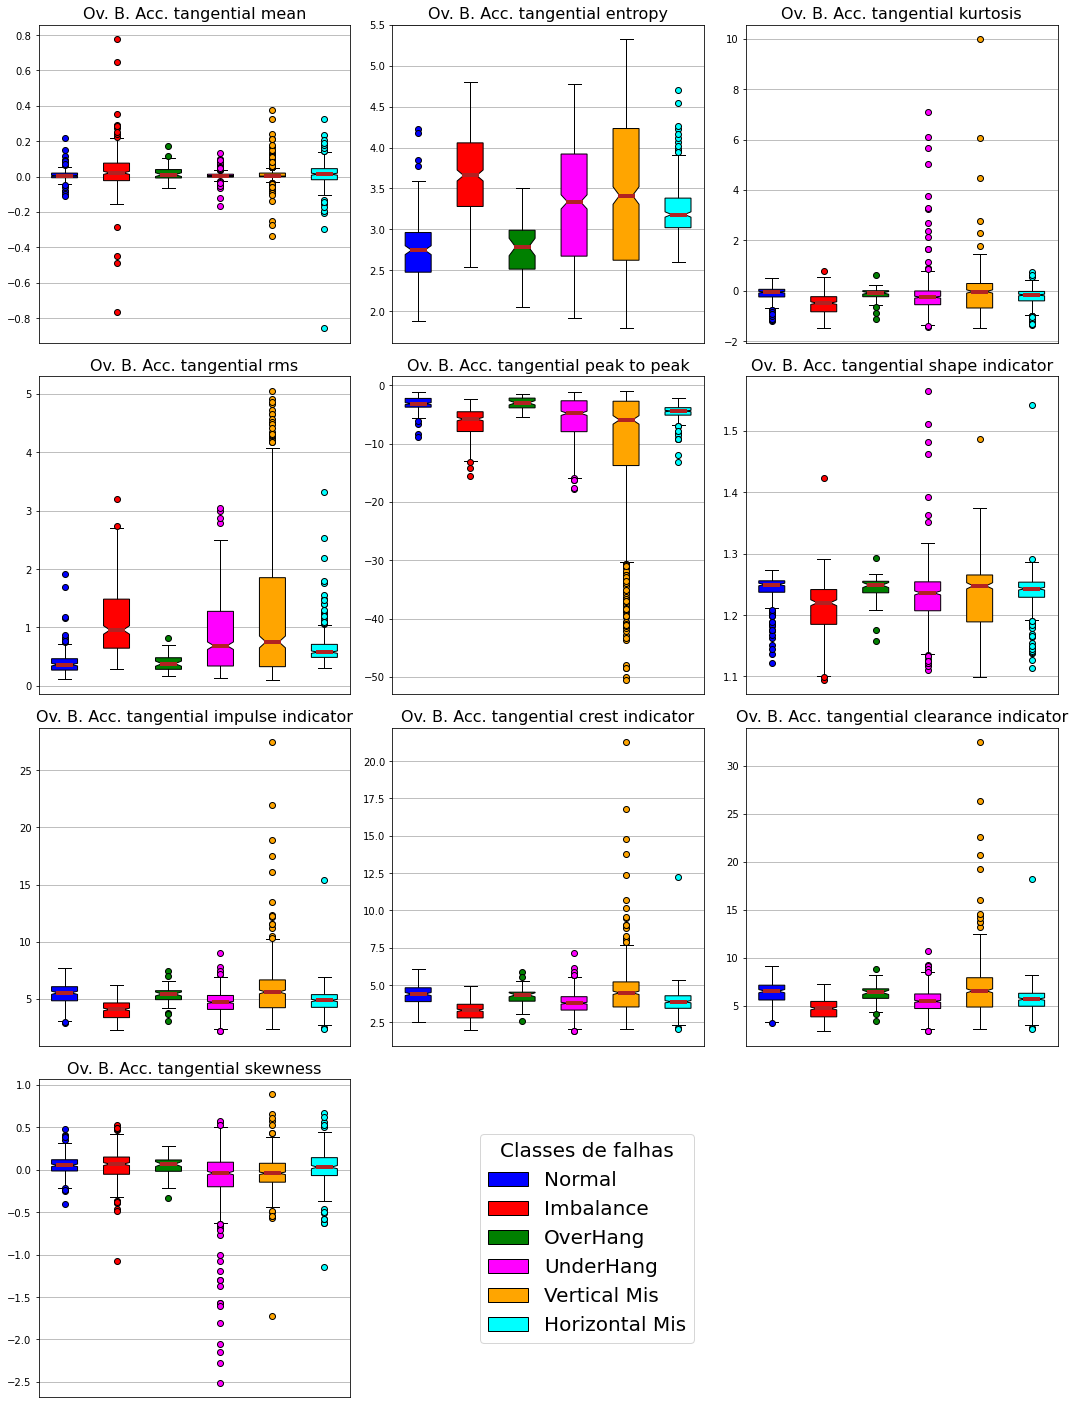

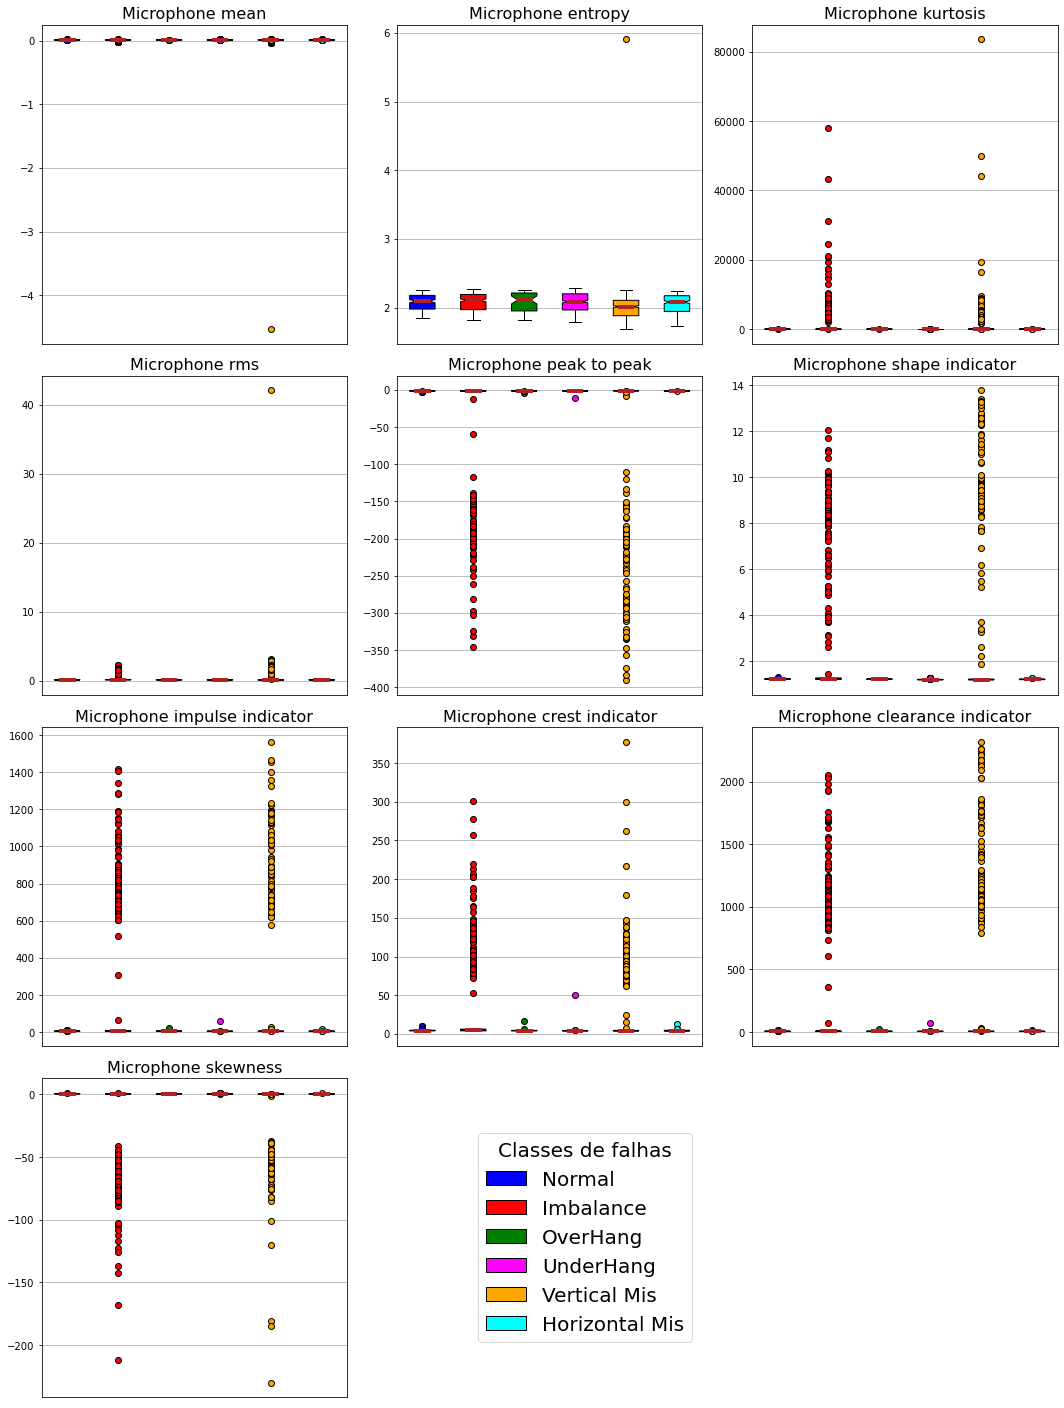

In [11]:
columns_names = ['Tachometer'
                 ,'Underhang Bearing accelerometer axial'
                 ,'Underhang Bearing accelerometer radiale'
                 ,'Underhang Bearing accelerometer tangential'
                 ,'Overhang Bearing accelerometer axial'
                 ,'Overhang Bearing accelerometer radiale'
                 ,'Overhang Bearing accelerometer tangential'
                 ,'Microphone']
classes = ['Normal','Imbalance','OverHang','UnderHang','Vertical Mis','Horizontal Mis']
colors = ['blue','red','green','magenta','orange','cyan']
metrics = ['mean', 'entropy' ,'kurtosis','rms','peak to peak','shape indicator','impulse indicator','crest indicator','clearance indicator','skewness']

medianprops = dict(linewidth=4, color='firebrick')

i = 4
for col in columns_names:
    fig, axs = plt.subplots(4,3, sharex=False, sharey=False,figsize=(15,20), facecolor = 'white')
    axs = axs.flatten()
    for j in range(len(metrics)):
        bplot = df.boxplot(column = df.columns[i],
                           by = 'Class6', 
                           ax = axs[j], 
                           return_type='dict',
                           patch_artist=True,
                           notch=True,
                           medianprops = medianprops)
        axs[j].set_title(df.columns[i].replace('Overhang bearing accelerometer','Ov. B. Acc.').replace('Underhang bearing accelerometer','Un. B. Acc.')
                         ,fontsize=16)
        axs[j].set_facecolor('white')
        #axs[j].tick_params(axis='x', labelrotation = 45)
        axs[j].get_xaxis().set_visible(False)
        #bplot = bplot[0]
        i += 1
        
        for patch, color,flier in zip(bplot[0]['boxes'], colors, bplot[0]['fliers']):
            patch.set_facecolor(color)
            patch.set(edgecolor='black', linewidth=1)
            #plt.setp(flier, color=color)
            flier.set(markerfacecolor=color)
            
        for whisker in bplot[0]['whiskers']:
            whisker.set(color='black', linewidth=1)
    
    
    fig.suptitle('')
    plt.tight_layout()
    
    axs[j+1].get_xaxis().set_visible(False)
    axs[j+1].get_yaxis().set_visible(False)
    axs[j+1].axis('off')
    legend = axs[j+1].legend(handles = bplot[0]['boxes'], labels = classes, loc='center right', title="Classes de falhas", prop={'size': 20})
    plt.setp(legend.get_title(),fontsize=20)
    
    fig.delaxes(axs[-1])

    plt.savefig(r'C:\Users\anogueira\OneDrive - OSIsoft, LLC\Data Science\USP\Metodologia\Charts\Processados\\' + 'processedData_boxplot_{}.png'.format(col),transparent = False)